In [3]:
import pandas as pd
import numpy as np
import math
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
sensor_data = pd.read_csv("sensor.csv")
#print(sensor_data)

In [12]:
sensor_vars = sensor_data.columns[0:51]
#print(sensor_vars)
print(sensor_data.columns)

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'machine_status'],
      dtype='object')


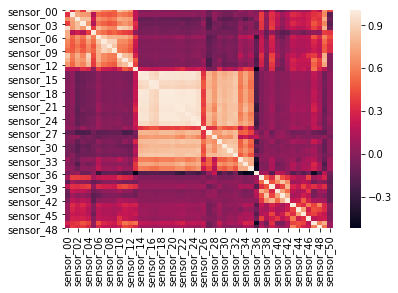

In [6]:
corr_matrix = sensor_data.iloc[:,0:51].corr()
sn.heatmap(corr_matrix, annot=False)

plt.rcParams["figure.figsize"] = [15,15]
plt.show()

In [7]:
counter = 0
for i in range(0,51):
    for j in range(i+1,51):
        if((corr_matrix.iloc[i,j]>0.7)|(corr_matrix.iloc[i,j]<-0.7)):
            print(counter,i,j,corr_matrix.iloc[i,j])
            counter = counter+1

0 0 4 0.9428028789326481
1 0 5 0.7566973352250803
2 0 6 0.750808168860059
3 0 10 0.8613919352806474
4 0 11 0.7707505400852791
5 1 2 0.7374026826143081
6 2 3 0.8223385617286377
7 2 4 0.8203386723498306
8 2 10 0.7565772510151207
9 2 11 0.7113079431635784
10 2 49 0.7490692594782408
11 4 6 0.8037876247508562
12 4 10 0.9075205080930019
13 4 11 0.8626186647555178
14 4 12 0.8031648160857097
15 4 49 0.7737139889093436
16 6 7 0.8530069459792413
17 6 8 0.7640076992608739
18 6 9 0.7750282540986705
19 6 10 0.7608943334617906
20 6 11 0.7547475200092366
21 7 8 0.9067437440865981
22 7 9 0.9028587709140193
23 8 9 0.8449277744881581
24 10 11 0.8258878749953601
25 10 12 0.7663192095038311
26 10 49 0.7606441658162324
27 11 12 0.8317189375550657
28 11 49 0.8004646558092033
29 12 49 0.7246790981111588
30 14 15 0.9903592959221927
31 14 16 0.9301889715950766
32 14 17 0.9011024997270574
33 14 18 0.9830390930185912
34 14 19 0.9799832628109519
35 14 20 0.9717016690171937
36 14 21 0.9722726328664288
37 14 22 0.9

In [8]:
normal_data = sensor_data.loc[sensor_data["machine_status"]=="NORMAL"]
broken_data = sensor_data.loc[sensor_data["machine_status"]=="BROKEN"]
recovering_data = sensor_data.loc[sensor_data["machine_status"]=="RECOVERING"]
#print(Normal_data)
print(len(normal_data), len(recovering_data), len(broken_data))

205836 14477 7


In [9]:
mean_df = pd.DataFrame(np.zeros((51,4))) # add min and max and distribution plots and try after normalizing data
mean_df.columns = ("Overall","NORMAL","RECOVERING","BROKEN")
for i in range(0,51):
    mean_df.iloc[i,0] = sensor_data.iloc[:,i].mean()
    mean_df.iloc[i,1] = normal_data.iloc[:,i].mean()
    mean_df.iloc[i,2] = recovering_data.iloc[:,i].mean()
    mean_df.iloc[i,3] = broken_data.iloc[:,i].mean()
#mean_df

In [10]:
median_df = pd.DataFrame(np.zeros((51,4)))
median_df.columns = ("Overall","NORMAL","RECOVERING","BROKEN")
for i in range(0,51):
    median_df.iloc[i,0] = sensor_data.iloc[:,i].describe()[5]
    median_df.iloc[i,1] = normal_data.iloc[:,i].describe()[5]
    median_df.iloc[i,2] = recovering_data.iloc[:,i].describe()[5]
    median_df.iloc[i,3] = broken_data.iloc[:,i].describe()[5]
#median_df

In [19]:
colors = pd.DataFrame(np.zeros(len(sensor_data)))
for i in range(0,len(colors)):
    if(sensor_data["machine_status"][i] == "NORMAL"):
        colors.iloc[i] = 0
    if(sensor_data["machine_status"][i] == "BROKEN"):
        colors.iloc[i] = 1
    if(sensor_data["machine_status"][i] == "RECOVERING"):
        colors.iloc[i] = 2

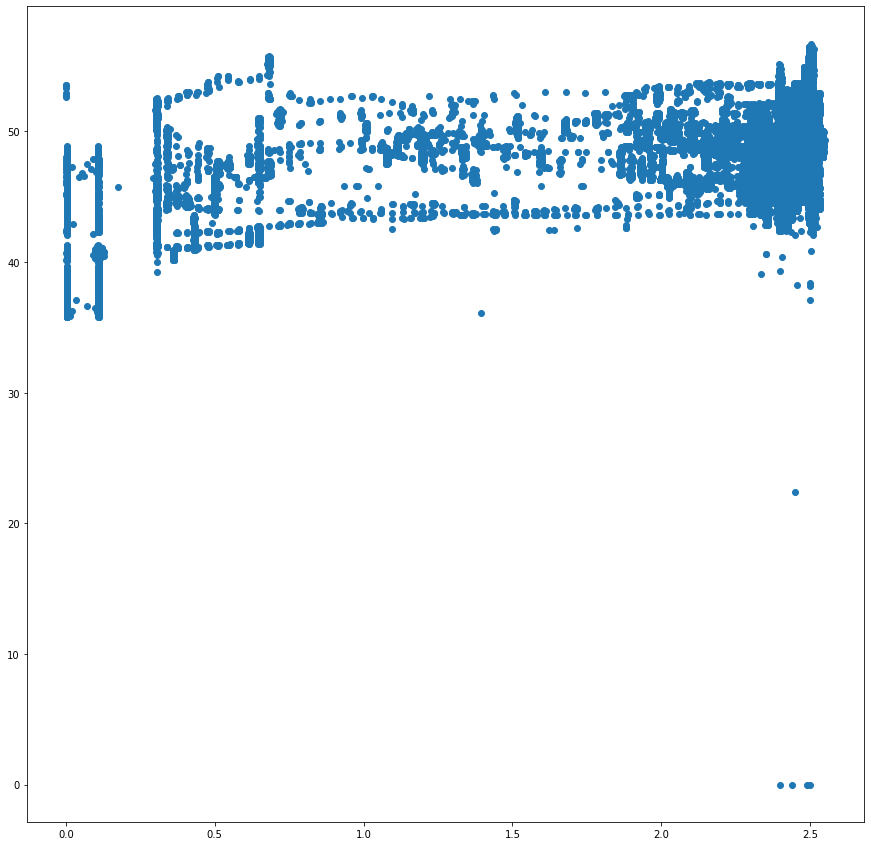

In [31]:

plt.scatter(sensor_data['sensor_00'], sensor_data['sensor_01'])